In [1]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits import mplot3d

In [3]:
sys.path.insert(0, '../')

In [4]:
from detmodel import detector
from detmodel import plane
from detmodel import signal

In [5]:
my_detector = detector.Detector()
my_detector.read_card('../cards/atlas_mdt.yml')
#my_detector.read_card('../cards/atlas_mdt_eml1.yml')

-- Initializing detector --
-- Reading card --


## Pass muon

In [6]:
my_detector.reset_planes()
my_detector.add_muon(
        mu_x=25., 
        mu_y=0., 
        mu_theta=0.2, 
        mu_phi=0, 
        mu_time=0
    )

[1, 1, 1, 1, 1, 1]

## Add noise

Noise rate in Hertz per plane. MM had a peak of 70kHz per strip, here we have 10 strips/plane.
Noise rate for MDT EML1 is 150 kHz per tube @HL-LHC, rate per plane is # tubes/plane times that rate.

In [7]:
my_detector.add_noise('constant', 10*150*1e3)

## Process signal

In [8]:
sigs = my_detector.get_signals(summary=True)

Total number of hits: 2
Total number of hits: 2
Total number of hits: 2
Total number of hits: 1
Total number of hits: 2
Total number of hits: 2


## Plot detector volume

In [9]:
from plotting import plotting

In [10]:
import importlib
importlib.reload(plotting)

<module 'plotting.plotting' from '../plotting/plotting.py'>

In [11]:
%matplotlib widget

Found muon signal, plane  0  xseg  5  time  -25.37743465467387
Found muon signal, plane  1  xseg  5  time  -11.954423268251702
Found muon signal, plane  2  xseg  6  time  -16.09549356476782
Found muon signal, plane  3  xseg  7  time  -3.938661899268967
Found muon signal, plane  4  xseg  7  time  -9.11762081380901
Found muon signal, plane  5  xseg  7  time  9.693495525116326
[Point3D(25, 0, 0)] [Point3D(44037925150231525/490033288920621, 0, 320)]


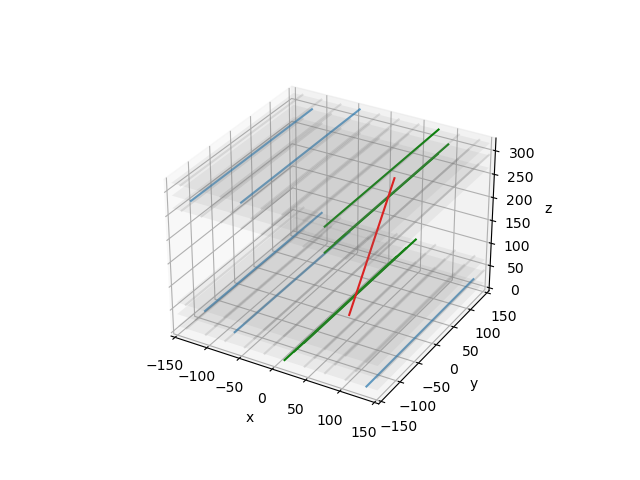

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plotting.plot_det_volume(my_detector, ax, draw_muon=1)
plt.show()

[Point3D(11257485569040025/490033288920621, 0, -10)] [Point3D(46421957119772725/490033288920621, 0, 344)]


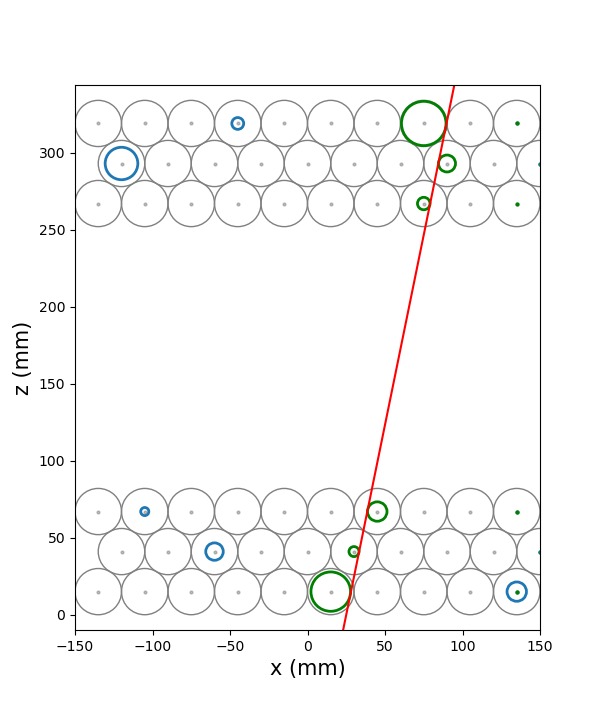

In [13]:
fig2 = plt.figure(figsize=(6,6*1.18))
ax2 = plt.axes()
plotting.plot_det_xz(my_detector, ax2, draw_muon=True, draw_allhits=False)
plt.show()

[Point3D(11257485569040025/490033288920621, 0, -10)] [Point3D(46421957119772725/490033288920621, 0, 344)]


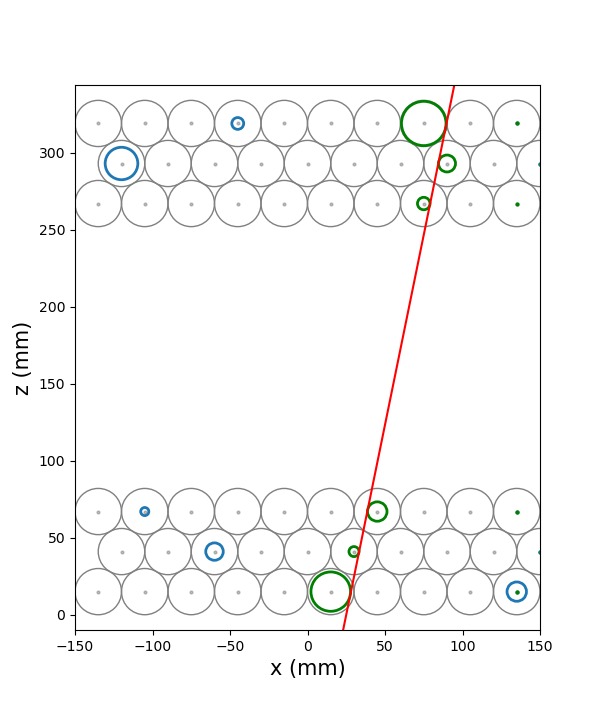

In [14]:
fig3 = plt.figure(figsize=(6,6*1.18))  # good for 10-tube wide atlas_mdt.yml
#fig3 = plt.figure(figsize=(28,6))   # good for 56-tube wide atlas_mdt_eml1.yml
ax3 = plt.axes()
plotting.plot_det_xz(my_detector, ax3, draw_muon=True, draw_allhits=True)
plt.show()